In [1]:
import os
import numpy as np
from tqdm.auto import tqdm
from anndata import read_h5ad, AnnData
import scanpy as sc

In [2]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 72 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

In [3]:
fraction_inceremnts = .9
min_cells = 100
max_subsamples = 1000
seed = 63784
rna_annData_file = '/fh/fast/setty_m/grp/lab-datasets/cd34-multiome/without-b-cells/cd34_multiome_rna_no_bcells.h5ad'
out_dir = 'data/subsamples/hierarchical/cd34/'

In [4]:
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [5]:
rna_ad = read_h5ad(rna_annData_file)

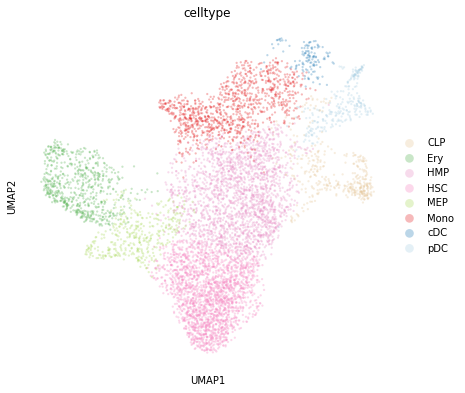

In [6]:
sc.pl.scatter(rna_ad, basis='umap', color='celltype', size=20, alpha=.3)

In [7]:
np.random.seed(seed)
sub_ad = rna_ad.copy()
n_digits = int(np.log10(max_subsamples) + 1)
m = 0
out_path = out_dir + f'sub_{m:0{n_digits}}.h5ad'
sub_ad.write(out_path)
n = sub_ad.n_obs
for m in tqdm(range(1, max_subsamples)):
    n = int(n * fraction_inceremnts)
    if n < min_cells:
        break
    idx = np.random.choice(sub_ad.n_obs, n, replace=False)
    sub_ad = sub_ad[idx, :]
    out_path = out_dir + f'sub_{m:0{n_digits}}.h5ad'
    sub_ad.write(out_path)
else:
    print(f'Stopped at {n:,} cells after {max_subsamples:,} iterations.')
print(f'Produced {m:,} subsamples.')

  0%|          | 0/999 [00:00<?, ?it/s]

Produced 40 subsamples.
